### 2020 해양 수산 빅데이터 경진대회

#### 데이터 분석 Process

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm;

warnings.filterwarnings("ignore")

In [2]:
sea_data = pd.read_csv('./result3.csv', encoding = 'cp949')


In [3]:
sea_data.head()


,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,파향,최대파주기,풍속,풍향,longitude,latitude,longitude_trans,latitude_trans,선박톤수2,선박연령2
0,1565,1565,부유물감김(안전저해),NaN,2015,1,1,11,13,8-12시,...,NaN,NaN,NaN,NaN,33.766667,125.550000,8.194174e+05,1532178.300,5톤~20톤미만,5년미만
1,1566,1566,기타,NaN,2015,1,2,3,30,0-4시,...,NaN,NaN,NaN,NaN,35.100000,129.383333,1.171659e+06,1679940.328,5톤~20톤미만,10년이상 15년미만
2,1567,1567,기타,NaN,2015,1,2,8,6,8-12시,...,358.0,6.1,11.1,313.0,36.973889,129.552500,1.182697e+06,1888129.415,1톤~5톤미만,10년이상 15년미만
3,1568,1568,기타,NaN,2015,1,2,8,45,8-12시,...,308.0,6.9,12.6,321.0,34.800000,126.363056,8.959977e+05,1645638.125,5톤~20톤미만,10년이상 15년미만
4,1569,1569,기타,NaN,2015,1,2,11,55,8-12시,...,266.0,3.8,10.4,321.0,34.733056,128.607222,1.101365e+06,1638183.644,1톤~5톤미만,10년이상 15년미만


In [4]:
#데이터 전처리 하기

In [5]:
sea_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '해양사고종류', '해상부유물', '해양사고발생(년도)',
       '해양사고발생(월)', '해양사고발생(일)', '해양사고발생(시)', '해양사고발생(분)', '해양사고발생시간대', '계절',
       '해양사고장소(위)', '해양사고장소(경)', '해양사고장소(기점)', '해양사고발생해역', '해양사고발생해역(통계용)',
       '선박국적(통계용)', '선박연령', '선박톤수', '톤수범위(통계용)', '선박용도(통계용)', '선박피해상황',
       '총합(사망+실종+부상)', '유의파고', '파향', '최대파주기', '풍속', '풍향', 'longitude',
       'latitude', 'longitude_trans', 'latitude_trans', '선박톤수2', '선박연령2'],
      dtype='object')

In [6]:
sea_data['해양사고종류']

0       부유물감김(안전저해)
1                기타
2                기타
3                기타
4                기타
           ...     
9592     안전사고(인명사상)
9593    부유물감김(안전저해)
9594             접촉
9595             기타
9596    부유물감김(안전저해)
Name: 해양사고종류, Length: 9597, dtype: object

In [7]:
#sea_data = sea_data.drop(['해상부유물', '해양사고발생지역(중)', '해양사고발생지역(소)', '선박국적(대분류)', '선박국적(상세)', '선박국적(통계용)','진수일자(년)', '진수일자(월)', '진수일자(일)', '항해구분구역', '선박용도(대)', '선박용도(중)', '선박용도(소)', '사망합계(선원+여객)', '실종합계(선원+여객)', '인명피해합계(사망+실종)', '부상합계(선원+여객)','해양사고발생(년도)','해양사고발생(일)','해양사고장소(위)','해양사고발생(시)','해양사고발생(분)','해양사고발생해역','파향','해양사고장소(위도)','해양사고장소(위분)','해양사고장소(위초)','해양사고장소(경)','해양사고장소(경도)','해양사고장소(경분)','해양사고장소(경초)','해양사고장소(기점)', '톤수범위(통계용)','파향','풍향','계절'], axis=1)

In [8]:
#선박요인(3개) + 환경요인(6개) + 사고결과(3개)로 데이터 feature를 뽑아낸다.

In [9]:
sea_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '해양사고종류', '해상부유물', '해양사고발생(년도)',
       '해양사고발생(월)', '해양사고발생(일)', '해양사고발생(시)', '해양사고발생(분)', '해양사고발생시간대', '계절',
       '해양사고장소(위)', '해양사고장소(경)', '해양사고장소(기점)', '해양사고발생해역', '해양사고발생해역(통계용)',
       '선박국적(통계용)', '선박연령', '선박톤수', '톤수범위(통계용)', '선박용도(통계용)', '선박피해상황',
       '총합(사망+실종+부상)', '유의파고', '파향', '최대파주기', '풍속', '풍향', 'longitude',
       'latitude', 'longitude_trans', 'latitude_trans', '선박톤수2', '선박연령2'],
      dtype='object')

In [10]:
#데이터가 가지는 특성인 연속형, 범주형에 따라서 데이터를 가공합니다.
#범주형 요인의 데이터를 숫자형으로 전환할때 단순히 1,2, 이런식으로 해서는 안됩니다.
#예를 들자면 A,B,C 특성을 가지는 데이터 요인은 곧바로 숫자형으로 변환하지 않고
#A,B,C 요인을 데이터의 열공간에 추가해준 뒤 0, 1 로 그 유무를 표현해야 합니다.
#자세한 사항은 https://bkshin.tistory.com/entry/DATA-19?category=1042793를 참고 했습니다.


In [11]:
#대표적으로 범주형 데이터의 value들을 확인해 봅시다.
#다음과 같이 어선, 여객선과 같이 string형 범주형으로 나뉘어 있습니다.

sea_data['선박용도(통계용)'].head

<bound method NDFrame.head of 0       어선
1       어선
2       어선
3       어선
4       어선
        ..
9592    어선
9593    어선
9594    어선
9595    어선
9596    어선
Name: 선박용도(통계용), Length: 9597, dtype: object>

In [12]:
#이를 pd.get_dummies를 활용해 value들을 특성(열)값들로 만들고 그 안의 유/무에 따라
#0, 1로 채워줍니다.

accidentTIME_encoding = pd.get_dummies(sea_data['선박용도(통계용)'])
sea_df = sea_data.join(accidentTIME_encoding)

sea_df

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,선박톤수2,선박연령2,기타선,기타선(부선),수상레저기구,어선,여객선,예인선,유조선,화물선
0,1565,1565,부유물감김(안전저해),NaN,2015,1,1,11,13,8-12시,...,5톤~20톤미만,5년미만,0,0,0,1,0,0,0,0
1,1566,1566,기타,NaN,2015,1,2,3,30,0-4시,...,5톤~20톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
2,1567,1567,기타,NaN,2015,1,2,8,6,8-12시,...,1톤~5톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
3,1568,1568,기타,NaN,2015,1,2,8,45,8-12시,...,5톤~20톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
4,1569,1569,기타,NaN,2015,1,2,11,55,8-12시,...,1톤~5톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,15595,15595,안전사고(인명사상),NaN,2019,12,30,16,30,16-20시,...,5톤~20톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
9593,15596,15596,부유물감김(안전저해),기타(정치망어망),2019,12,31,3,23,0-4시,...,50톤~100톤미만,20년이상,0,0,0,1,0,0,0,0
9594,15597,15597,접촉,NaN,2019,12,31,6,36,4-8시,...,20톤 ~ 50톤미만,5년이상 10년미만,0,0,0,1,0,0,0,0
9595,15598,15598,기타,NaN,2019,12,31,8,38,8-12시,...,5톤~20톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0


In [13]:
#NaN값을 0으로 채워줍니다.
sea_df = sea_df.fillna(0)

sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,선박톤수2,선박연령2,기타선,기타선(부선),수상레저기구,어선,여객선,예인선,유조선,화물선
0,1565,1565,부유물감김(안전저해),0,2015,1,1,11,13,8-12시,...,5톤~20톤미만,5년미만,0,0,0,1,0,0,0,0
1,1566,1566,기타,0,2015,1,2,3,30,0-4시,...,5톤~20톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
2,1567,1567,기타,0,2015,1,2,8,6,8-12시,...,1톤~5톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
3,1568,1568,기타,0,2015,1,2,8,45,8-12시,...,5톤~20톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0
4,1569,1569,기타,0,2015,1,2,11,55,8-12시,...,1톤~5톤미만,10년이상 15년미만,0,0,0,1,0,0,0,0


In [14]:
#이때, get_dummies로 분리되는 특징들 중 하나의 변수 값을 삭제 해주어야 합니다.
#나뉘어지는 특징들 중 하나가 denpendent한 관계들을 형성하기 때문입니다.
#이를 다중공신성(Multicollinearity)이라고 하며, 하나의 변수를 intercept형태로 만들어 해결합니다.
#이제 결과요인 - 선박,환경요인간의 데이터 관계를 sm.OLS(선형 회귀 분석)을 통해 진행하겠습니다. 
#원인:선박연령, 결과: 인명사고발생

sea_df['intercept'] = 1
sm.OLS(sea_df['총합(사망+실종+부상)'], sea_df[['intercept', '선박연령']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           총합(사망+실종+부상)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.868
Date:                Tue, 16 Aug 2022   Prob (F-statistic):             0.0904
Time:                        11:31:12   Log-Likelihood:                -14868.
No. Observations:                9597   AIC:                         2.974e+04
Df Residuals:                    9595   BIC:                         2.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2150      0.020     10.498      0.000       0.175       0.255
선박연령          -0.0020      0.001     -1.694      0.090      -0.004       0.000
==============================================================================
Omnibus:                    25216.770   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        997206277.519
Skew:                          30.559   Prob(JB):                         0.00
Kurtosis:                    1580.992   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#이를 pd.get_dummies를 활용해 value들을 특성(열)값들로 만들고 그 안의 유/무에 따라
#0, 1로 채워줍니다.

accidentTIME_encoding = pd.get_dummies(sea_data['해양사고종류'])
sea_df = sea_data.join(accidentTIME_encoding)

#NaN값을 0으로 채워줍니다.
sea_df = sea_df.fillna(0)

sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,부유물감김(안전저해),안전사고(인명사상),운항저해,전복,접촉,좌초,충돌,침몰,해양오염,화재 · 폭발
0,1565,1565,부유물감김(안전저해),0,2015,1,1,11,13,8-12시,...,1,0,0,0,0,0,0,0,0,0
1,1566,1566,기타,0,2015,1,2,3,30,0-4시,...,0,0,0,0,0,0,0,0,0,0
2,1567,1567,기타,0,2015,1,2,8,6,8-12시,...,0,0,0,0,0,0,0,0,0,0
3,1568,1568,기타,0,2015,1,2,8,45,8-12시,...,0,0,0,0,0,0,0,0,0,0
4,1569,1569,기타,0,2015,1,2,11,55,8-12시,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['기관손상'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   기관손상   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     52.09
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           5.69e-13
Time:                        11:31:12   Log-Likelihood:                -5815.8
No. Observations:                9597   AIC:                         1.164e+04
Df Residuals:                    9595   BIC:                         1.165e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령          -0.0033      0.000     -7.218      0.000      -0.004      -0.002
intercept      0.3189      0.008     40.001      0.000       0.303       0.335
==============================================================================
Omnibus:                     2766.977   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2007.217
Skew:                           1.017   Prob(JB):                         0.00
Kurtosis:                       2.060   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['안전사고(인명사상)'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             안전사고(인명사상)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07150
Date:                Tue, 16 Aug 2022   Prob (F-statistic):              0.789
Time:                        11:31:12   Log-Likelihood:                -244.24
No. Observations:                9597   AIC:                             492.5
Df Residuals:                    9595   BIC:                             506.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령        6.745e-05      0.000      0.267      0.789      -0.000       0.001
intercept      0.0650      0.004     14.564      0.000       0.056       0.074
==============================================================================
Omnibus:                     6693.792   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61425.478
Skew:                           3.497   Prob(JB):                         0.00
Kurtosis:                      13.232   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['운항저해'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   운항저해   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.313
Date:                Tue, 16 Aug 2022   Prob (F-statistic):             0.0379
Time:                        11:31:12   Log-Likelihood:                 2121.7
No. Observations:                9597   AIC:                            -4239.
Df Residuals:                    9595   BIC:                            -4225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령          -0.0004      0.000     -2.077      0.038      -0.001    -2.3e-05
intercept      0.0451      0.003     12.946      0.000       0.038       0.052
==============================================================================
Omnibus:                     8847.803   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204850.488
Skew:                           4.747   Prob(JB):                         0.00
Kurtosis:                      23.546   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['전복'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     전복   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1486
Date:                Tue, 16 Aug 2022   Prob (F-statistic):              0.700
Time:                        11:31:12   Log-Likelihood:                 5299.1
No. Observations:                9597   AIC:                        -1.059e+04
Df Residuals:                    9595   BIC:                        -1.058e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령       -5.458e-05      0.000     -0.386      0.700      -0.000       0.000
intercept      0.0206      0.003      8.224      0.000       0.016       0.026
==============================================================================
Omnibus:                    11679.289   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904930.171
Skew:                           6.894   Prob(JB):                         0.00
Kurtosis:                      48.529   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['좌초'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     좌초   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.584
Date:                Tue, 16 Aug 2022   Prob (F-statistic):            0.00590
Time:                        11:31:12   Log-Likelihood:                 1063.2
No. Observations:                9597   AIC:                            -2122.
Df Residuals:                    9595   BIC:                            -2108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령          -0.0006      0.000     -2.754      0.006      -0.001      -0.000
intercept      0.0582      0.004     14.953      0.000       0.051       0.066
==============================================================================
Omnibus:                     7888.298   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120895.632
Skew:                           4.154   Prob(JB):                         0.00
Kurtosis:                      18.274   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['충돌'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     충돌   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8352
Date:                Tue, 16 Aug 2022   Prob (F-statistic):              0.361
Time:                        11:31:12   Log-Likelihood:                -4415.8
No. Observations:                9597   AIC:                             8836.
Df Residuals:                    9595   BIC:                             8850.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령           0.0004      0.000      0.914      0.361      -0.000       0.001
intercept      0.1738      0.007     25.228      0.000       0.160       0.187
==============================================================================
Omnibus:                     2434.496   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4742.727
Skew:                           1.674   Prob(JB):                         0.00
Kurtosis:                       3.804   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['침몰'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     침몰   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     128.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.76e-29
Time:                        11:31:12   Log-Likelihood:                 6939.6
No. Observations:                9597   AIC:                        -1.388e+04
Df Residuals:                    9595   BIC:                        -1.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령           0.0013      0.000     11.312      0.000       0.001       0.002
intercept     -0.0055      0.002     -2.595      0.009      -0.010      -0.001
==============================================================================
Omnibus:                    12937.044   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1736047.540
Skew:                           8.059   Prob(JB):                         0.00
Kurtosis:                      66.888   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['해양오염'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   해양오염   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           6.48e-24
Time:                        11:31:12   Log-Likelihood:                 7441.0
No. Observations:                9597   AIC:                        -1.488e+04
Df Residuals:                    9595   BIC:                        -1.486e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령           0.0011      0.000     10.111      0.000       0.001       0.001
intercept     -0.0040      0.002     -1.976      0.048      -0.008   -3.06e-05
==============================================================================
Omnibus:                    13427.194   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2199416.610
Skew:                           8.563   Prob(JB):                         0.00
Kurtosis:                      75.159   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['화재 · 폭발'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                화재 · 폭발   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     29.15
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           6.84e-08
Time:                        11:31:12   Log-Likelihood:                 1371.9
No. Observations:                9597   AIC:                            -2740.
Df Residuals:                    9595   BIC:                            -2726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령           0.0012      0.000      5.399      0.000       0.001       0.002
intercept      0.0295      0.004      7.828      0.000       0.022       0.037
==============================================================================
Omnibus:                     8137.688   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139304.244
Skew:                           4.301   Prob(JB):                         0.00
Kurtosis:                      19.565   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#이를 pd.get_dummies를 활용해 value들을 특성(열)값들로 만들고 그 안의 유/무에 따라
#0, 1로 채워줍니다.

accidentTIME_encoding = pd.get_dummies(sea_data['선박피해상황'])
sea_df = sea_data.join(accidentTIME_encoding)

#NaN값을 0으로 채워줍니다.
sea_df = sea_df.fillna(0)

sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,미상,손상 - 감항능력 상실 - 대파,손상 - 감항능력 상실 - 중파,손상 - 감항능력 유지,손상 - 감항능력 유지 - 경파,손상-감항능력 상실,전손 - 실제전손,전손 - 추정전손 - 구난,전손 - 추정전손 - 미구난,침몰후인양
0,1565,1565,부유물감김(안전저해),0,2015,1,1,11,13,8-12시,...,0,0,0,0,1,0,0,0,0,0
1,1566,1566,기타,0,2015,1,2,3,30,0-4시,...,0,0,0,0,1,0,0,0,0,0
2,1567,1567,기타,0,2015,1,2,8,6,8-12시,...,0,0,0,0,1,0,0,0,0,0
3,1568,1568,기타,0,2015,1,2,8,45,8-12시,...,0,0,0,0,0,0,0,0,0,1
4,1569,1569,기타,0,2015,1,2,11,55,8-12시,...,0,0,0,0,1,0,0,0,0,0


In [26]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['손상 - 감항능력 유지 - 경파'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      손상 - 감항능력 유지 - 경파   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     39.67
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           3.14e-10
Time:                        11:31:12   Log-Likelihood:                -6598.6
No. Observations:                9597   AIC:                         1.320e+04
Df Residuals:                    9595   BIC:                         1.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령          -0.0031      0.000     -6.298      0.000      -0.004      -0.002
intercept      0.4128      0.009     47.719      0.000       0.396       0.430
==============================================================================
Omnibus:                    42743.215   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.859
Skew:                           0.543   Prob(JB):                         0.00
Kurtosis:                       1.313   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['무손'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     무손   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     44.73
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           2.39e-11
Time:                        11:31:12   Log-Likelihood:                -4889.3
No. Observations:                9597   AIC:                             9783.
Df Residuals:                    9595   BIC:                             9797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령           0.0027      0.000      6.688      0.000       0.002       0.004
intercept      0.1651      0.007     22.809      0.000       0.151       0.179
==============================================================================
Omnibus:                     1928.227   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3386.055
Skew:                           1.453   Prob(JB):                         0.00
Kurtosis:                       3.141   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['손상 - 감항능력 유지'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           손상 - 감항능력 유지   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.539
Date:                Tue, 16 Aug 2022   Prob (F-statistic):            0.00605
Time:                        11:31:13   Log-Likelihood:                -6509.1
No. Observations:                9597   AIC:                         1.302e+04
Df Residuals:                    9595   BIC:                         1.304e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령          -0.0013      0.000     -2.746      0.006      -0.002      -0.000
intercept      0.3694      0.009     43.102      0.000       0.353       0.386
==============================================================================
Omnibus:                    48040.092   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1657.347
Skew:                           0.628   Prob(JB):                         0.00
Kurtosis:                       1.398   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['침몰후인양'], sea_df[['선박연령', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  침몰후인양   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     28.90
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           7.78e-08
Time:                        11:31:13   Log-Likelihood:                 8591.3
No. Observations:                9597   AIC:                        -1.718e+04
Df Residuals:                    9595   BIC:                        -1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
선박연령           0.0005      0.000      5.376      0.000       0.000       0.001
intercept      0.0020      0.002      1.146      0.252      -0.001       0.006
==============================================================================
Omnibus:                    14584.543   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3799187.095
Skew:                           9.857   Prob(JB):                         0.00
Kurtosis:                      98.459   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#이를 pd.get_dummies를 활용해 value들을 특성(열)값들로 만들고 그 안의 유/무에 따라
#0, 1로 채워줍니다.

accidentTIME_encoding = pd.get_dummies(sea_data['해양사고발생시간대'])
sea_df = sea_data.join(accidentTIME_encoding)

#NaN값을 0으로 채워줍니다.
sea_df = sea_df.fillna(0)

sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,longitude_trans,latitude_trans,선박톤수2,선박연령2,0-4시,12-16시,16-20시,20-24시,4-8시,8-12시
0,1565,1565,부유물감김(안전저해),0,2015,1,1,11,13,8-12시,...,8.194174e+05,1532178.300,5톤~20톤미만,5년미만,0,0,0,0,0,1
1,1566,1566,기타,0,2015,1,2,3,30,0-4시,...,1.171659e+06,1679940.328,5톤~20톤미만,10년이상 15년미만,1,0,0,0,0,0
2,1567,1567,기타,0,2015,1,2,8,6,8-12시,...,1.182697e+06,1888129.415,1톤~5톤미만,10년이상 15년미만,0,0,0,0,0,1
3,1568,1568,기타,0,2015,1,2,8,45,8-12시,...,8.959977e+05,1645638.125,5톤~20톤미만,10년이상 15년미만,0,0,0,0,0,1
4,1569,1569,기타,0,2015,1,2,11,55,8-12시,...,1.101365e+06,1638183.644,1톤~5톤미만,10년이상 15년미만,0,0,0,0,0,1


In [31]:
#원인:해양 사고 유형, 결과: 선박연령

sea_df['intercept'] = 1
sm.OLS(sea_df['선박연령'], sea_df[['4-8시','8-12시', '12-16시', '16-20시', '20-24시', 'intercept']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   선박연령   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.129
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           0.000953
Time:                        11:31:13   Log-Likelihood:                -35749.
No. Observations:                9597   AIC:                         7.151e+04
Df Residuals:                    9591   BIC:                         7.155e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
4-8시          -1.2231      0.420     -2.912      0.004      -2.047      -0.400
8-12시         -1.3982      0.403     -3.470      0.001      -2.188      -0.608
12-16시        -1.6969      0.410     -4.138      0.000      -2.501      -0.893
16-20시        -1.2033      0.430     -2.798      0.005      -2.046      -0.360
20-24시        -0.6406      0.492     -1.301      0.193      -1.606       0.325
intercept     15.7698      0.348     45.369      0.000      15.088      16.451
==============================================================================
Omnibus:                     1256.973   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.642
Skew:                           0.922   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         9.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#이때, get_dummies로 분리되는 특징들 중 하나의 변수 값을 삭제 해주어야 합니다.
#나뉘어지는 특징들 중 하나가 denpendent한 관계들을 형성하기 때문입니다.
#이를 다중공신성(Multicollinearity)이라고 하며, 하나의 변수를 intercept형태로 만들어 해결합니다.
#이제 결과요인 - 선박,환경요인간의 데이터 관계를 sm.OLS(선형 회귀 분석)을 통해 진행하겠습니다. 


sea_df['intercept'] = 1
sm.OLS(sea_df['총합(사망+실종+부상)'], sea_df[['intercept', '선박연령']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           총합(사망+실종+부상)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.868
Date:                Tue, 16 Aug 2022   Prob (F-statistic):             0.0904
Time:                        11:31:13   Log-Likelihood:                -14868.
No. Observations:                9597   AIC:                         2.974e+04
Df Residuals:                    9595   BIC:                         2.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2150      0.020     10.498      0.000       0.175       0.255
선박연령          -0.0020      0.001     -1.694      0.090      -0.004       0.000
==============================================================================
Omnibus:                    25216.770   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        997206277.519
Skew:                          30.559   Prob(JB):                         0.00
Kurtosis:                    1580.992   Cond. No.                         31.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
sea_df['총합(사망+실종+부상)'].head()

0    0
1    0
2    0
3    0
4    0
Name: 총합(사망+실종+부상), dtype: int64

In [34]:
#다음과 같이 선박용도(통계용) 범주형 데이터가 그 value별로 나뉘어서 열에 기록된 것을
#볼 수 있습니다.
sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(월),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,...,latitude_trans,선박톤수2,선박연령2,0-4시,12-16시,16-20시,20-24시,4-8시,8-12시,intercept
0,1565,1565,부유물감김(안전저해),0,2015,1,1,11,13,8-12시,...,1532178.300,5톤~20톤미만,5년미만,0,0,0,0,0,1,1
1,1566,1566,기타,0,2015,1,2,3,30,0-4시,...,1679940.328,5톤~20톤미만,10년이상 15년미만,1,0,0,0,0,0,1
2,1567,1567,기타,0,2015,1,2,8,6,8-12시,...,1888129.415,1톤~5톤미만,10년이상 15년미만,0,0,0,0,0,1,1
3,1568,1568,기타,0,2015,1,2,8,45,8-12시,...,1645638.125,5톤~20톤미만,10년이상 15년미만,0,0,0,0,0,1,1
4,1569,1569,기타,0,2015,1,2,11,55,8-12시,...,1638183.644,1톤~5톤미만,10년이상 15년미만,0,0,0,0,0,1,1


In [38]:
sea_df

Index(['Unnamed: 0', 'Unnamed: 0.1', '해양사고종류', '해상부유물', '해양사고발생(년도)',
       '해양사고발생(월)', '해양사고발생(일)', '해양사고발생(시)', '해양사고발생(분)', '해양사고발생시간대', '계절',
       '해양사고장소(위)', '해양사고장소(경)', '해양사고장소(기점)', '해양사고발생해역', '해양사고발생해역(통계용)',
       '선박국적(통계용)', '선박연령', '선박톤수', '톤수범위(통계용)', '선박용도(통계용)', '선박피해상황',
       '총합(사망+실종+부상)', '유의파고', '파향', '최대파주기', '풍속', '풍향', 'longitude',
       'latitude', 'longitude_trans', 'latitude_trans', '선박톤수2', '선박연령2',
       '0-4시', '12-16시', '16-20시', '20-24시', '4-8시', '8-12시', 'intercept'],
      dtype='object')

In [39]:

#이때, get_dummies로 분리되는 특징들 중 하나의 변수 값을 삭제 해주어야 합니다.
#나뉘어지는 특징들 중 하나가 denpendent한 관계들을 형성하기 때문입니다.
#이를 다중공신성(Multicollinearity)이라고 하며, 하나의 변수를 intercept형태로 만들어 해결합니다.


In [40]:
accident_M_TIME_encoding = pd.get_dummies(sea_data['해양사고발생(월)'])
sea_df = sea_df.join(accident_M_TIME_encoding)
sea_df = sea_df.drop('해양사고발생(월)', axis=1)
sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(일),해양사고발생(시),해양사고발생(분),해양사고발생시간대,계절,...,3,4,5,6,7,8,9,10,11,12
0,1565,1565,부유물감김(안전저해),0,2015,1,11,13,8-12시,겨울,...,0,0,0,0,0,0,0,0,0,0
1,1566,1566,기타,0,2015,2,3,30,0-4시,겨울,...,0,0,0,0,0,0,0,0,0,0
2,1567,1567,기타,0,2015,2,8,6,8-12시,겨울,...,0,0,0,0,0,0,0,0,0,0
3,1568,1568,기타,0,2015,2,8,45,8-12시,겨울,...,0,0,0,0,0,0,0,0,0,0
4,1569,1569,기타,0,2015,2,11,55,8-12시,겨울,...,0,0,0,0,0,0,0,0,0,0


In [41]:
sea_df = sea_df = sea_df.drop(12, axis=1)

In [43]:
accident_D_TIME_encoding = pd.get_dummies(sea_data['해양사고발생시간대'], prefix = '시간대')
sea_df = sea_df.join(accident_D_TIME_encoding)
sea_df = sea_df.drop('해양사고발생시간대', axis=1)
sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(일),해양사고발생(시),해양사고발생(분),계절,해양사고장소(위),...,8,9,10,11,시간대_0-4시,시간대_12-16시,시간대_16-20시,시간대_20-24시,시간대_4-8시,시간대_8-12시
0,1565,1565,부유물감김(안전저해),0,2015,1,11,13,겨울,북,...,0,0,0,0,0,0,0,0,0,1
1,1566,1566,기타,0,2015,2,3,30,겨울,북,...,0,0,0,0,1,0,0,0,0,0
2,1567,1567,기타,0,2015,2,8,6,겨울,북,...,0,0,0,0,0,0,0,0,0,1
3,1568,1568,기타,0,2015,2,8,45,겨울,북,...,0,0,0,0,0,0,0,0,0,1
4,1569,1569,기타,0,2015,2,11,55,겨울,북,...,0,0,0,0,0,0,0,0,0,1


In [44]:
sea_df = sea_df.drop('0-4시', axis=1)

In [45]:
acident_spot_encoding = pd.get_dummies(sea_data['해양사고발생해역(통계용)'])
sea_df = sea_df.join(acident_spot_encoding)
sea_df = sea_df.drop('해양사고발생해역(통계용)', axis=1)
sea_df.head()

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(일),해양사고발생(시),해양사고발생(분),계절,해양사고장소(위),...,서해공해,서해영해,"여수항, 광양항 및 진입수로","울산항(미포만포함), 포항항",원양,인천항 및 진입수로,일본수역,"장항항,군산항 및 진입수로","제주항, 서귀포항","평택항, 당진항"
0,1565,1565,부유물감김(안전저해),0,2015,1,11,13,겨울,북,...,1,0,0,0,0,0,0,0,0,0
1,1566,1566,기타,0,2015,2,3,30,겨울,북,...,0,0,0,0,0,0,0,0,0,0
2,1567,1567,기타,0,2015,2,8,6,겨울,북,...,0,0,0,0,0,0,0,0,0,0
3,1568,1568,기타,0,2015,2,8,45,겨울,북,...,0,1,0,0,0,0,0,0,0,0
4,1569,1569,기타,0,2015,2,11,55,겨울,북,...,0,0,0,0,0,0,0,0,0,0


In [46]:
sea_df = sea_df.drop('원양', axis=1)

In [47]:
#NaN값을 0으로 채워줍니다.
sea_df = sea_df.fillna(0)

In [48]:
sea_df

,Unnamed: 0,Unnamed: 0.1,해양사고종류,해상부유물,해양사고발생(년도),해양사고발생(일),해양사고발생(시),해양사고발생(분),계절,해양사고장소(위),...,"삼천포, 통영항, 통영해만, 견내량수로",서해공해,서해영해,"여수항, 광양항 및 진입수로","울산항(미포만포함), 포항항",인천항 및 진입수로,일본수역,"장항항,군산항 및 진입수로","제주항, 서귀포항","평택항, 당진항"
0,1565,1565,부유물감김(안전저해),0,2015,1,11,13,겨울,북,...,0,1,0,0,0,0,0,0,0,0
1,1566,1566,기타,0,2015,2,3,30,겨울,북,...,0,0,0,0,0,0,0,0,0,0
2,1567,1567,기타,0,2015,2,8,6,겨울,북,...,0,0,0,0,0,0,0,0,0,0
3,1568,1568,기타,0,2015,2,8,45,겨울,북,...,0,0,1,0,0,0,0,0,0,0
4,1569,1569,기타,0,2015,2,11,55,겨울,북,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,15595,15595,안전사고(인명사상),0,2019,30,16,30,겨울,북,...,0,0,1,0,0,0,0,0,0,0
9593,15596,15596,부유물감김(안전저해),기타(정치망어망),2019,31,3,23,겨울,북,...,0,0,0,0,0,0,0,0,0,0
9594,15597,15597,접촉,0,2019,31,6,36,겨울,북,...,0,0,0,0,0,0,0,0,0,0
9595,15598,15598,기타,0,2019,31,8,38,겨울,북,...,0,0,0,0,0,0,0,1,0,0


In [49]:
#pearson 상관관계분석을 통해서 상관관계를 분석하고 이를 heat map으로 표현합니다.
#상관관계(Correalation)은 두 변수가 어떤 선형적 관계를 갖고 있는 지를 분석합니다.
#두 변수간의 인과관계c를 볼 수 있으며 원인과 결과의 인과관계는 회귀분석을 통해
#인과관계의 방향, 정도와 수학적 모델을 확인할 수 있습니다.
#이 값들 중 결과요인(선박피해, 인명사고 발생수, 사건유형)과 연관관계가 높은 데이터 feature들을 구합니다.

sea_cor = sea_df
sea_cor.corr(method='pearson')

,Unnamed: 0,Unnamed: 0.1,해양사고발생(년도),해양사고발생(일),해양사고발생(시),해양사고발생(분),선박연령,선박톤수,총합(사망+실종+부상),유의파고,...,"삼천포, 통영항, 통영해만, 견내량수로",서해공해,서해영해,"여수항, 광양항 및 진입수로","울산항(미포만포함), 포항항",인천항 및 진입수로,일본수역,"장항항,군산항 및 진입수로","제주항, 서귀포항","평택항, 당진항"
Unnamed: 0,1.000000,1.000000,0.980179,0.010146,-0.010160,0.045538,0.122229,-0.018542,0.012916,-0.051339,...,-0.034118,-0.006858,-0.006198,-0.015522,0.006266,0.006290,-0.056862,0.037589,-0.005181,0.020994
Unnamed: 0.1,1.000000,1.000000,0.980179,0.010146,-0.010160,0.045538,0.122229,-0.018542,0.012916,-0.051339,...,-0.034118,-0.006858,-0.006198,-0.015522,0.006266,0.006290,-0.056862,0.037589,-0.005181,0.020994
해양사고발생(년도),0.980179,0.980179,1.000000,-0.002406,-0.010526,0.042151,0.130109,-0.012353,0.013860,-0.052808,...,-0.030886,-0.014676,-0.016876,-0.011593,0.016149,0.010269,-0.051199,0.039302,-0.004854,0.022488
해양사고발생(일),0.010146,0.010146,-0.002406,1.000000,0.014006,-0.006781,-0.005378,-0.001716,0.000569,-0.008143,...,0.000364,0.010380,0.003650,0.004429,0.001859,0.000776,0.024905,0.002197,-0.013419,0.012230
해양사고발생(시),-0.010160,-0.010160,-0.010526,0.014006,1.000000,0.008552,-0.010973,-0.006926,-0.000757,0.019607,...,0.005687,0.007676,0.015999,-0.001845,0.021517,0.013664,-0.024486,0.021540,-0.029094,-0.014352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
인천항 및 진입수로,0.006290,0.006290,0.010269,0.000776,0.013664,0.007723,0.056565,0.040929,-0.013981,0.013059,...,-0.013317,-0.016615,-0.075395,-0.008254,-0.019480,1.000000,-0.008649,-0.013631,-0.006309,-0.009479
일본수역,-0.056862,-0.056862,-0.051199,0.024905,-0.024486,-0.002322,0.002570,0.019025,0.000819,0.006967,...,-0.007254,-0.009050,-0.041068,-0.004496,-0.010611,-0.008649,1.000000,-0.007425,-0.003437,-0.005163
"장항항,군산항 및 진입수로",0.037589,0.037589,0.039302,0.002197,0.021540,0.005099,0.032901,-0.001671,-0.010001,0.011307,...,-0.011432,-0.014263,-0.064724,-0.007086,-0.016723,-0.013631,-0.007425,1.000000,-0.005416,-0.008137
"제주항, 서귀포항",-0.005181,-0.005181,-0.004854,-0.013419,-0.029094,-0.008484,0.007607,0.004176,-0.008192,0.005512,...,-0.005291,-0.006602,-0.029959,-0.003280,-0.007740,-0.006309,-0.003437,-0.005416,1.000000,-0.003766


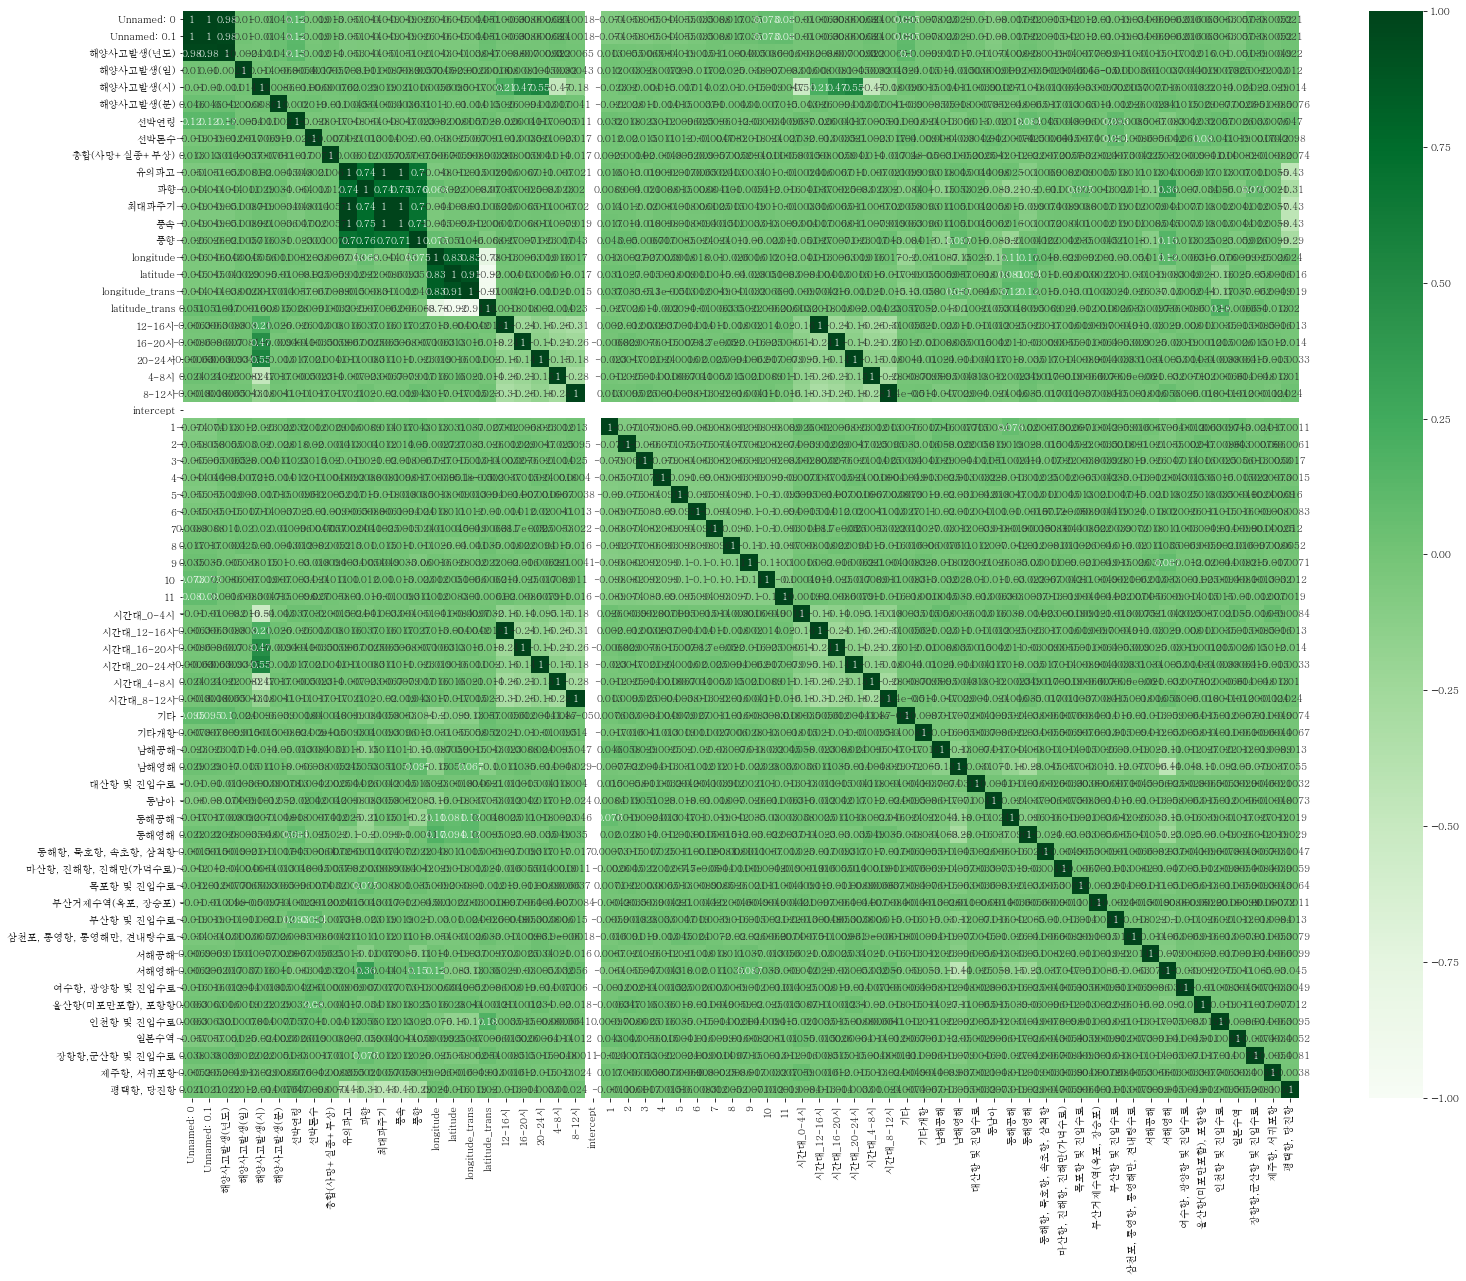

In [50]:
import matplotlib as mpl
import seaborn as sb
mpl.rc('font', family='Batang')
plt.rcParams["figure.figsize"] = (25,20)
sb.heatmap(sea_cor.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [ ]:
sea_df.to_csv("result_r.csv", encoding="utf_8_sig")

In [51]:
sea_df = sea_df.fillna(0)
